# Simple analysis on COVID-19 data


### Section 1. Most recent situation

In this section, I vized the accumulated numbers of cases and increased numbers of cases in China and outside China, of the most recent day. Also, I incorporated the infection rate in each country.

#### Part A. Accumulated numbers 

In [2]:
# load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
time_series_path = '/Users/wanqiwang/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series'
confirmed_data = pd.read_csv(time_series_path + '/time_series_19-covid-Confirmed.csv')
deaths_data = pd.read_csv(time_series_path + '/time_series_19-covid-Deaths.csv')
recovered_data = pd.read_csv(time_series_path + '/time_series_19-covid-Recovered.csv')

In [4]:
first_day = list(confirmed_data.columns)[4]
last_day = list(confirmed_data.columns)[-2]; 
print('First day: ',first_day,'\nLast day:',last_day)

First day:  1/22/20 
Last day: 3/17/20


In [1]:
# aggregate the newest data
newest_data = pd.merge(left=confirmed_data[['Province/State','Country/Region',last_day]], right=deaths_data[['Province/State','Country/Region',last_day]], left_on=['Province/State','Country/Region'], right_on=['Province/State','Country/Region'])
newest_data = pd.merge(left=newest_data, right=recovered_data[['Province/State','Country/Region',last_day]], left_on=['Province/State','Country/Region'], right_on=['Province/State','Country/Region'])
newest_data.rename(columns={last_day+'_x':'Confirmed',last_day+'_y':'Deaths',last_day:'Recovered'}, inplace=True)
newest_data = newest_data[newest_data['Confirmed']>0]
newest_data["Recovered Rate"] = newest_data["Recovered"]/newest_data["Confirmed"]

# China
newest_data_China = newest_data[newest_data['Country/Region']=='China']
newest_data_China.set_index('Province/State', drop=True, inplace=True)
# Remove Hubei
# Since there are too many confirmed cases in Hubei, we treat it as a seperate region
newest_data_exHubei = newest_data_China[newest_data_China.index!='Hubei']

# Total number in China
sum_cases_China = newest_data_China.sum()
sum_cases_China = sum_cases_China[['Confirmed','Deaths','Recovered']]
print(last_day,"\nAccumulated(includes Hubei):")
print(sum_cases_China)


# plot data
sns.set()
plt.rcParams['figure.figsize'] = (20,9)
fig = plt.figure()
ax1 = fig.add_subplot(111)
bar_width = 0.2
tick_label = list(newest_data_exHubei.index)
x=np.arange(len(tick_label))
ax1.bar(x, newest_data_exHubei['Confirmed'],bar_width,label='Confirmed',color='C0')
ax1.bar(x+bar_width, newest_data_exHubei['Deaths'],bar_width, label='Deaths', color='C3')
ax1.bar(x+2*bar_width, newest_data_exHubei['Recovered'],bar_width, label='Recovered',color='C2')
plt.legend(loc='upper left')
plt.xticks(x+bar_width,tick_label,rotation=45)
ax2 = ax1.twinx()
ax2.plot(x+bar_width, newest_data_exHubei['Recovered Rate'],label='Recovery rate',color='C1')
ax2.set_ylim([0, 1.01]) 
plt.legend(loc='upper right')
# plt.xticks(x+bar_width/2,tick_label,rotation=45)
plt.title('Accumulated numbers of China(except Wuhan)',fontsize=16, verticalalignment='bottom')
plt.show()

NameError: name 'pd' is not defined

3/17/20 
Accumulated:
Confirmed    110345.0
Deaths         4599.0
Recovered     11643.0
dtype: float64


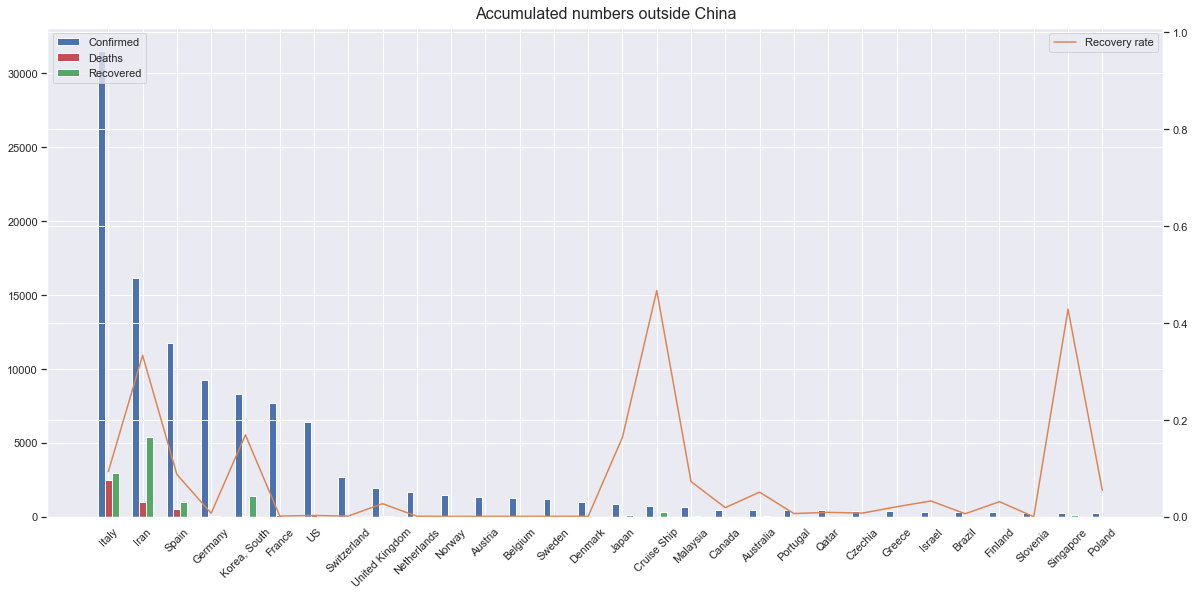

In [6]:
# Other country except China
# It is better to show the situation in each continent
newest_data_Country = newest_data.groupby('Country/Region').sum()
newest_data_Country = newest_data_Country[newest_data_Country.index!='China']
newest_data_Country["Recovered Rate"] = newest_data_Country["Recovered"]/newest_data_Country["Confirmed"]
newest_data_Country = newest_data_Country[newest_data_Country["Confirmed"]>0]
newest_data_Country.sort_values(by='Confirmed', inplace=True, ascending=False)
newest_data_Country = newest_data_Country.iloc[0:30]



# Total number of cases
sum_cases_exChina = newest_data_Country.sum()
sum_cases_exChina = sum_cases_exChina[['Confirmed','Deaths','Recovered']]
print(last_day,"\nAccumulated:")
print(sum_cases_exChina)

plt.rcParams['figure.figsize'] = (20,9)
fig = plt.figure()
ax1 = fig.add_subplot(111)
bar_width = 0.2
tick_label = list(newest_data_Country.index)
x=np.arange(len(tick_label))
ax1.bar(x, newest_data_Country['Confirmed'],bar_width,label='Confirmed',color='C0')
ax1.bar(x+bar_width, newest_data_Country['Deaths'],bar_width, label='Deaths', color='C3')
ax1.bar(x+2*bar_width, newest_data_Country['Recovered'],bar_width, label='Recovered',color='C2')
plt.legend(loc='upper left')
plt.xticks(x+bar_width,tick_label,rotation=45)
ax2 = ax1.twinx()
ax2.plot(x+bar_width, newest_data_Country['Recovered Rate'],label='Recovery rate',color='C1')
ax2.set_ylim([0, 1.01]) 
plt.legend(loc='upper right')
# plt.xticks(x+bar_width/2,tick_label,rotation=45)
plt.title('Accumulated numbers outside China',fontsize=16, verticalalignment='bottom')
plt.show()

#### Part B. Increased numbers

#### Part C. Infectious rate


In [172]:
# Read population csv, downloaded from UN
population = pd.read_csv("WPP2019_TotalPopulationBySex.csv")

population_2019 = population[population["Time"]==2019]
population_2019.set_index('LocID',inplace=True)

# This command helps a lot to change the names
# population_2019[population_2019["Location"].str.contains("guernsey")]

population_2019.loc[44, 'Location'] = 'The Bahamas'
population_2019.loc[68, 'Location'] = 'Bolivia'
population_2019.loc[96, 'Location'] = 'Brunei'
population_2019.loc[158, 'Location'] = 'Taiwan*'
population_2019.loc[178, 'Location'] = 'Congo (Brazzaville)'
population_2019.loc[180, 'Location'] = 'Congo (Kinshasa)'
population_2019.loc[270, 'Location'] = 'The Gambia'
population_2019.loc[364, 'Location'] = 'Iran'
population_2019.loc[384, 'Location'] = "Cote d'Ivoire"
population_2019.loc[410, 'Location'] = 'Korea, South'
population_2019.loc[498, 'Location'] = 'Moldova'
population_2019.loc[643, 'Location'] = 'Russia'
population_2019.loc[862, 'Location'] = 'Venezuela'
population_2019.loc[704, 'Location'] = 'Vietnam'
population_2019.loc[834, 'Location'] = 'Tanzania'
population_2019.loc[840, 'Location'] = 'US'


In [173]:
# newest data of all countries
newest_data_all = newest_data.groupby('Country/Region').sum()
newest_data_all['Location'] = newest_data_all.index

                Confirmed  Infection Rate(%)  PopTotal(k)
Country/Region                                           
San Marino            109           0.032188       33.864
Holy See                1           0.012270        0.815


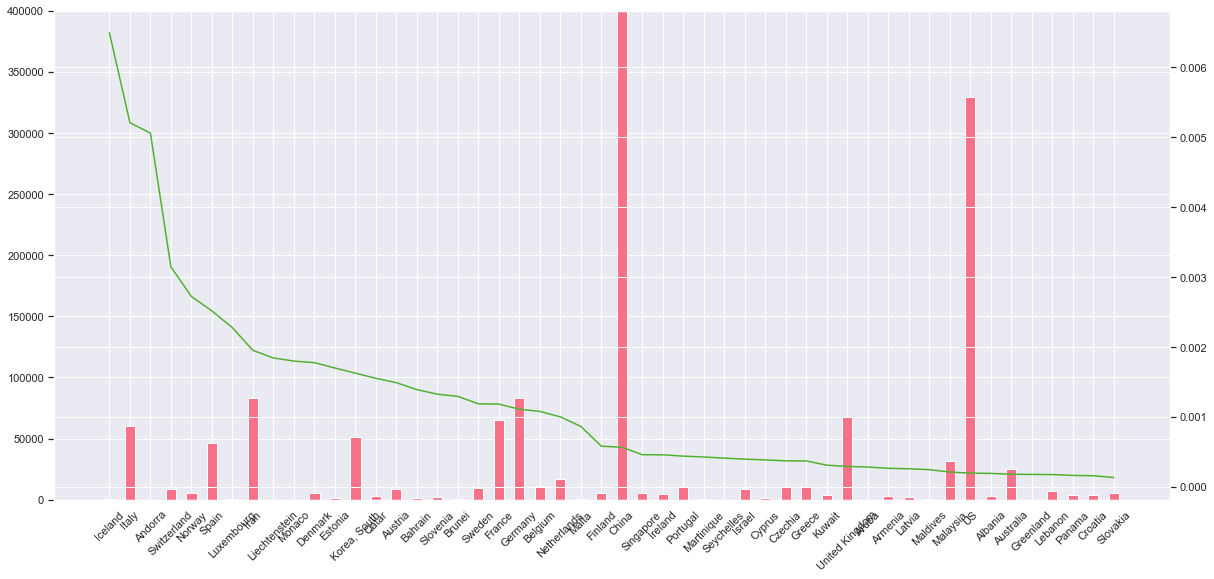

In [243]:
# Infection rate
merge = newest_data_all.merge(population_2019, how='left',left_on='Location', right_on='Location')
no_data_region = merge[merge['PopTotal'].isnull()]['Location'].tolist()
merge = merge[['Confirmed', 'Deaths', 'Recovered', 'Location','PopMale', 'PopFemale','PopTotal', 'PopDensity']]
merge.rename(columns={'Location':'Country/Region', 'PopTotal':'PopTotal(k)'}, inplace=True)
merge.set_index('Country/Region', inplace=True)
merge['Infection Rate(%)'] = merge['Confirmed']/merge['PopTotal(k)']*0.01
merge.sort_values('Infection Rate(%)', ascending=False, inplace=True)

print(merge[['Confirmed','Infection Rate(%)', 'PopTotal(k)']][:2])

fig = plt.figure()
ax1 = fig.add_subplot(111)
bar_width = 0.5
#tick_label = list(newest_data_Country.index)
x=np.arange(50)
tick_label = merge.index[2:52].tolist()
ax1.bar(x,merge['PopTotal(k)'][2:52],bar_width,color='C3')
plt.xticks(x,tick_label,rotation=45)
ax1.set_ylim([0,400000])
#ax1.bar(x+bar_width, newest_data_Country['Deaths'],bar_width, label='Deaths', color='C3')
#ax1.bar(x+2*bar_width, newest_data_Country['Recovered'],bar_width, label='Recovered',color='C2')
#plt.legend(loc='upper left')
#plt.xticks(x+bar_width,tick_label,rotation=45)
ax2 = ax1.twinx()
ax2.plot(x, merge['Infection Rate(%)'][2:52],color='C1')
#ax2.set_ylim([0, 1.01]) 
#plt.legend(loc='upper right')
#plt.xticks(x+bar_width/2,tick_label,rotation=45)
#plt.title('Accumulated numbers outside China',fontsize=16, verticalalignment='bottom')
plt.show()

### Section 2. Time series analysis

In this section, I mainly want to see the development of this virus around world. There are several parts.

First, I vized the increasement in each country. Then, I tried to test if the increasment in confirmed cases does fit a exponetial growth or a sigmoid growth.

Second, I compared the situation in China, Italy and US, three typical country in Asia, Europe and North America. The 爆发期 in these three countries are different, and I tried to see if the three country have similar incresing mode despite different information given.

#### Part A. Increasement in each country

In [7]:
# Group country dimension data
confirmed_data.set_index(['Country/Region','Province/State'], drop=True, inplace=True)
deaths_data.set_index(['Country/Region','Province/State'], drop=True, inplace=True)
recovered_data.set_index(['Country/Region','Province/State'], drop=True, inplace=True)

In [8]:
# Time series analysis

confirmed_country = confirmed_data.groupby(['Country/Region']).sum()
confirmed_country.sort_values(by=[last_day], inplace=True, ascending=False)
confirmed_num = confirmed_country[confirmed_country[last_day]>0].shape[0]

deaths_country = deaths_data.groupby(['Country/Region']).sum()
deaths_country.sort_values(by=[last_day], inplace=True, ascending=False)
deaths_num = deaths_country[deaths_country[last_day]>0].shape[0]

recovered_country = recovered_data.groupby(['Country/Region']).sum()
recovered_country.sort_values(by=[last_day], inplace=True, ascending=False)
recovered_num = recovered_country[recovered_country[last_day]>0].shape[0]

max_num = max(confirmed_num, deaths_num, recovered_num)

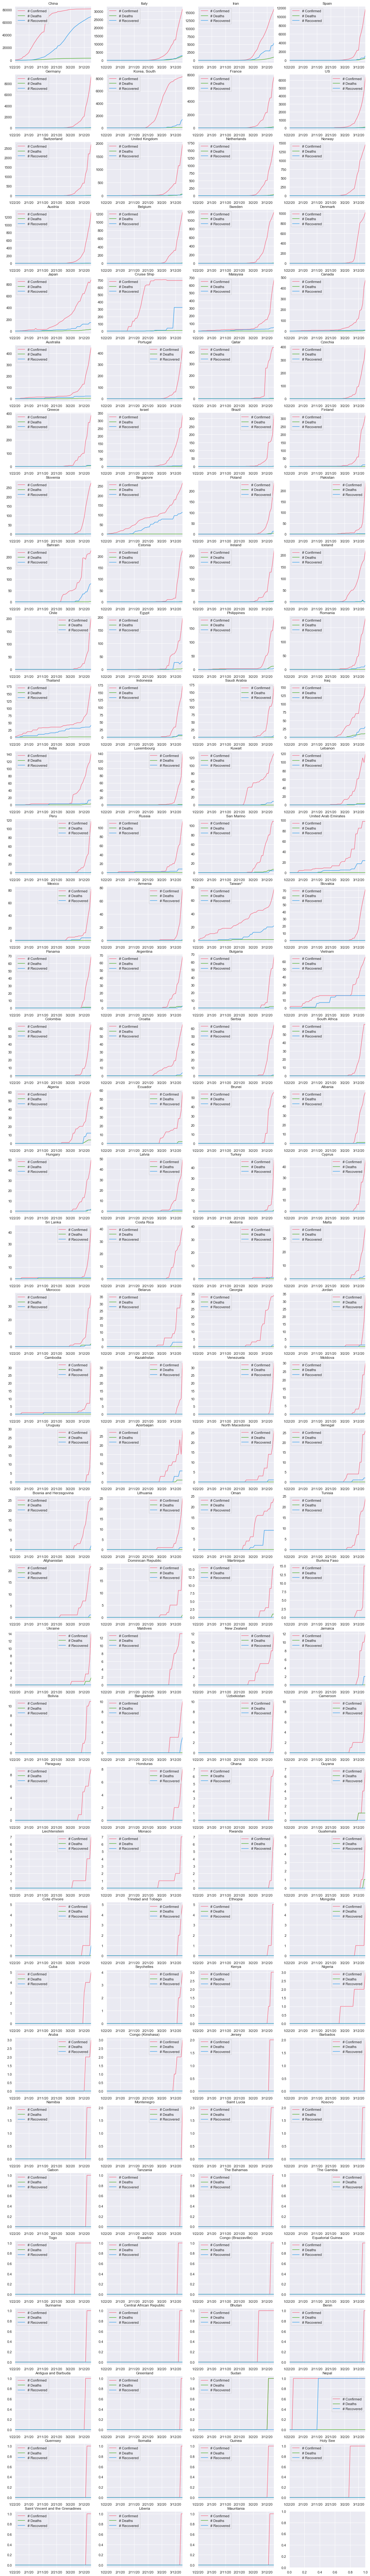

In [9]:
# Growth rate of confirmed cases, deaths cases and recovered cases in each country
# sns.set()
# sns.set_palette("husl",3)
# sns.color_palette("husl")
nrows = int(max_num/4)+1

fig, axes = plt.subplots(nrows=nrows, ncols= 4)
fig.set_figheight(150)
fig.set_figwidth(20)

for i in range(0, max_num):
    row = int(i/4)
    col = i%4
    subset = confirmed_country.iloc[i,2:-1]
    subset.plot(kind='line', ax=axes[row][col], label='# Confirmed')
    
    subset = deaths_country.loc[subset.name,first_day:last_day]
    subset.plot(kind='line', ax=axes[row][col], label='# Deaths')
    
    subset = recovered_country.loc[subset.name,first_day:last_day]
    subset.plot(kind='line', ax=axes[row][col], label='# Recovered')

    axes[row][col].set_title(subset.name)
    axes[row][col].legend(loc='best')

#### Part B. China, Italy and U.S.

In [67]:
confirmed_three = confirmed_country.loc[["China","Italy","US"],first_day:last_day].T
deaths_three = deaths_country.loc[["China","Italy","US"],first_day:last_day].T
recovered_three = recovered_country.loc[["China","Italy","US"],first_day:last_day].T


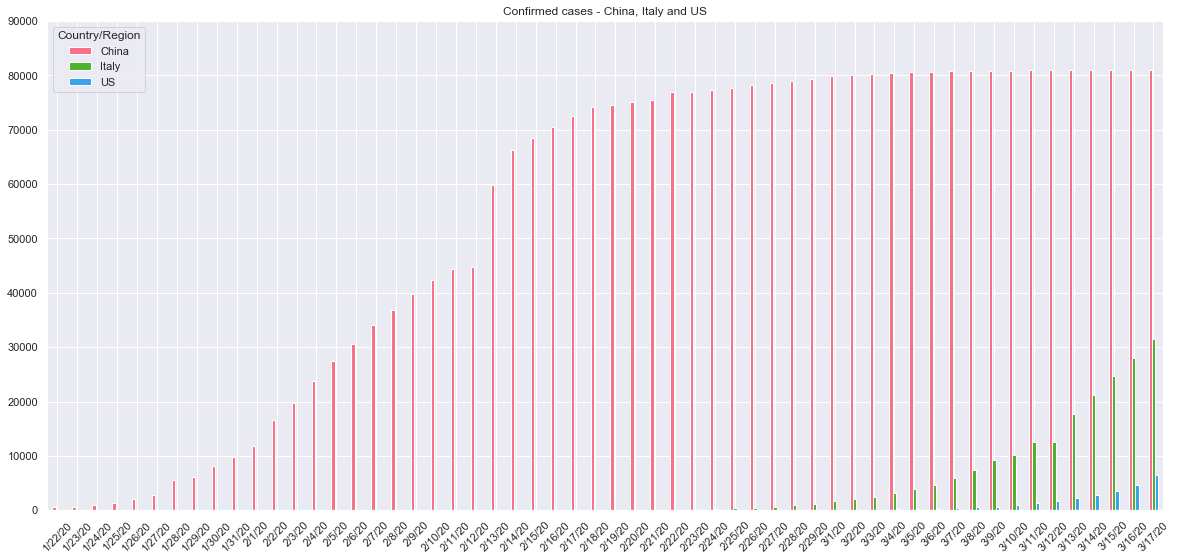

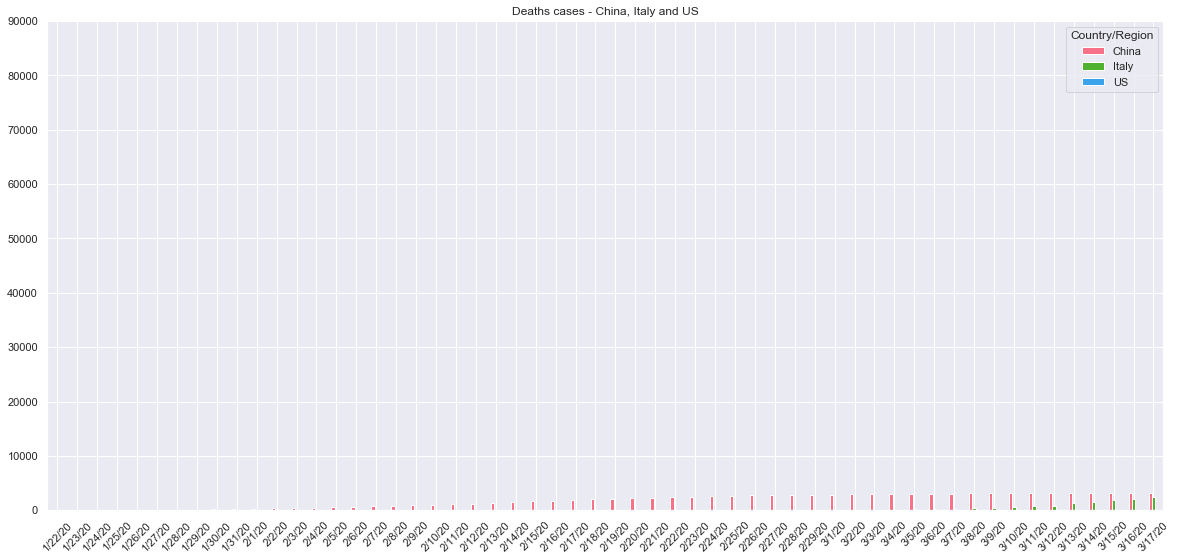

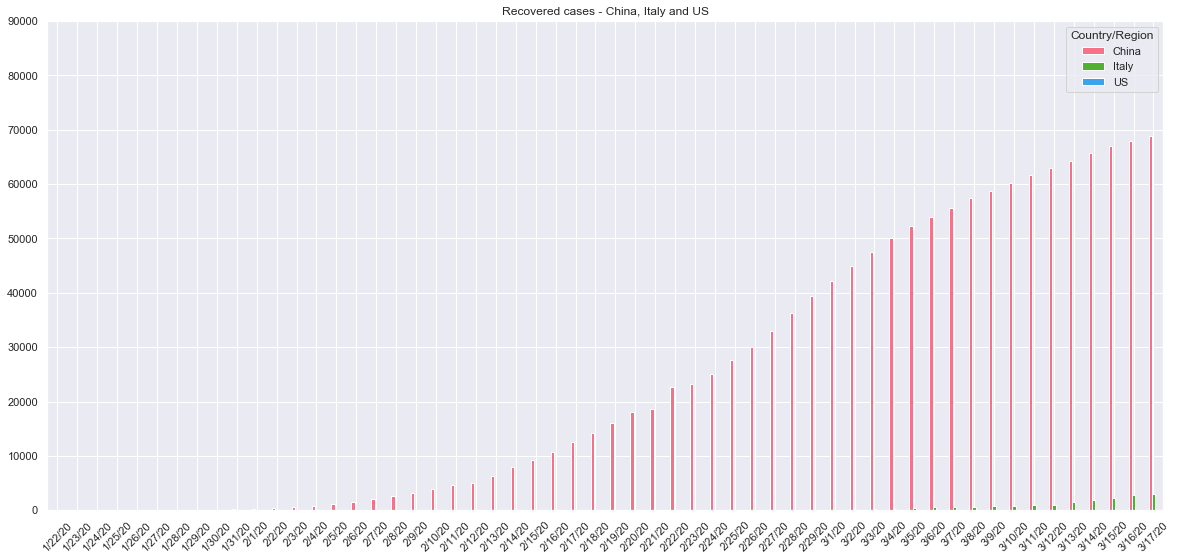

In [75]:
confirmed_three.plot.bar()
plt.xticks(rotation=45)
plt.title("Confirmed cases - China, Italy and US")
plt.ylim(0,90000)
plt.show()

deaths_three.plot.bar()
plt.xticks(rotation=45)
plt.title("Deaths cases - China, Italy and US")
plt.ylim(0,90000)
plt.show()

recovered_three.plot.bar()
plt.xticks(rotation=45)
plt.title("Recovered cases - China, Italy and US")
plt.ylim(0,90000)
plt.show()

    


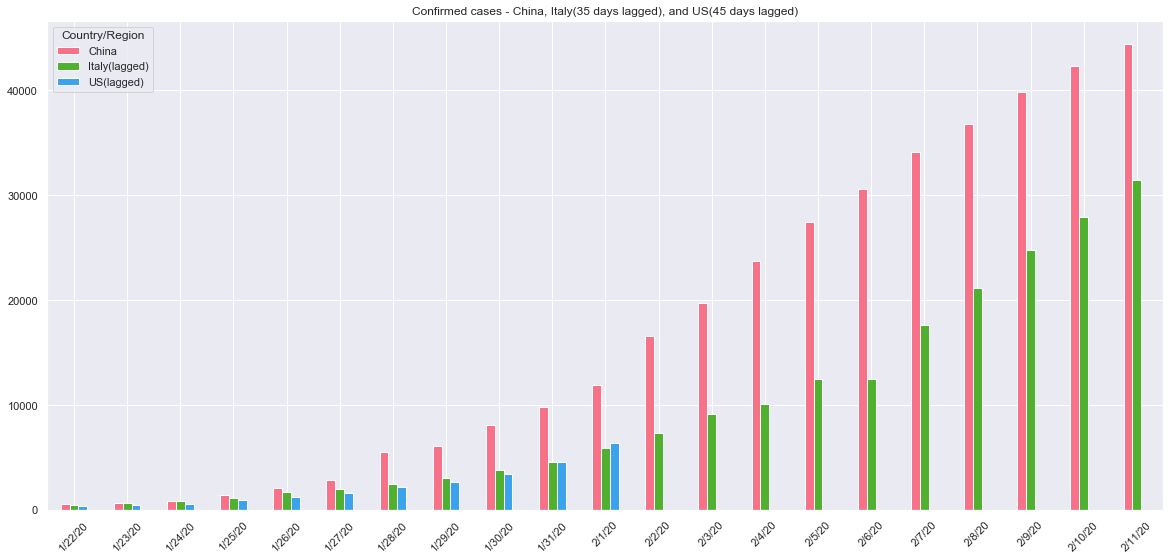

In [63]:
# Calculate the lag days
import datetime

n = 400
first_day_ita = confirmed_three[(confirmed_three['Italy']>n)].index.tolist()[0]
first_day_us = confirmed_three[(confirmed_three['US']>n)].index.tolist()[0]

first_date = datetime.datetime.strptime(first_day, '%m/%d/%y')
ita_date = datetime.datetime.strptime(first_day_ita, '%m/%d/%y')
us_date = datetime.datetime.strptime(first_day_us, '%m/%d/%y')

ita_delta = int((ita_date - first_date).days)
us_delta = int((us_date - first_date).days)

confirmed_three["Italy(lagged)"] = confirmed_three["Italy"].shift(-ita_delta)
confirmed_three["US(lagged)"] = confirmed_three["US"].shift(-us_delta)

confirmed_three_lagged = confirmed_three[["China","Italy(lagged)","US(lagged)"]].copy()
confirmed_three_lagged = confirmed_three_lagged[confirmed_three_lagged["Italy(lagged)"]>0]
                                
confirmed_three_lagged.plot.bar()
plt.xticks(rotation=45)
plt.title("Confirmed cases - China, Italy("+str(ita_delta)+" days lagged), and US("+str(us_delta)+" days lagged)")
plt.show()

#### Part C. Fitting data

There are several classical models for epdemics. Among thoes, SI model and SIR model are two simple and basic models.

In SI model, there are only two kinds of people -- susceptible and indectious. This model only considers the ...

### Section 3. Some distributions about confirmed cases

#### Part A. Use K-Means to study the geographic structure of confirmed cases

### Section 4. Financial analysis

In this section, I want to discover some connection between the coronavirus and financial market by using data.

First, we know that three indices triggered circuit breaker in the past two, three weeks. How about different industries? Which ones are influenced by the virus the most? Therefore, I calculated the correlation between cases and stock prices to see the connection here.